In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
%run function.ipynb

In [3]:
path = 'D:\\資料處理\\SBAdata\\SBAnational.csv'
df = pd.read_csv(path)
df_copy = df.copy()
display(df.iloc[:5,:11])
display(df.iloc[:5,11:])

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240


,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
df_copy.shape

(899164, 27)

In [5]:
df2 = df.iloc[:50, :]

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [7]:
# 處理日期
d_cols = ['ChgOffDate', 'DisbursementDate', 'ApprovalDate']
df_copy[d_cols] = df_copy[d_cols].fillna('xx-xx-xx')

for col in d_cols:
    
    df_copy[col + '_year'] = df_copy[col].astype('str').apply(lambda x: x.split('-')[2])
    df_copy[col + '_month'] = df_copy[col].astype('str').apply(lambda x: x.split('-')[1])
    df_copy[col + '_day'] = df_copy[col].astype('str').apply(lambda x: x.split('-')[0])

# df_copy.drop(d_cols, axis=1, inplace=True)
df_copy.drop('ApprovalFY', axis=1, inplace=True)

mon_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
            'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12, 'xx': 'xx'}

# 月份文字轉數字
df_copy['ChgOffDate_month'] = df_copy['ChgOffDate_month'].map(mon_dict)
df_copy['DisbursementDate_month'] = df_copy['DisbursementDate_month'].map(mon_dict)
df_copy['ApprovalDate_month'] = df_copy['ApprovalDate_month'].map(mon_dict)

year_cols = ['ChgOffDate_year', 'DisbursementDate_year', 'ApprovalDate_year']

df_copy[year_cols] = df_copy[year_cols].astype('str').applymap(year_2d_to_4d)

In [8]:
# 金錢欄位清理
money_cols = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
df_copy.loc[:, money_cols] = df_copy.loc[:, money_cols].applymap(money_clean)
df_copy[money_cols] = df_copy[money_cols].astype('int64')

In [9]:
# 類別欄位清理
df_copy['NewExist'] = df_copy['NewExist'].map({2: 0, 1: 1})
df_copy['UrbanRural'] = df_copy['UrbanRural'].map({2: 0, 0: -1, 1: 1})
df_copy['RevLineCr'] = df_copy['RevLineCr'].map({'Y': 1, 'N': 0})
df_copy['LowDoc'] = df_copy['LowDoc'].map({'Y': 1, 'N': 0})

In [10]:
df_copy['Industry'] = df_copy['NAICS'].astype('str').apply(lambda x: x[:2])
df_copy['Industry'] = df_copy['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin',
    '0': 'Unknown'
})

df_copy.drop('NAICS', axis=1, inplace=True)

In [11]:
df_copy = df_copy.apply(lambda x: x.replace('xx', np.nan))
df_copy = df_copy.apply(lambda x: x.replace('xx-xx-xx', np.nan))

# 缺失值處理

In [12]:
# 找不到 RevLineCr的缺失規律，填-1變第三個類別
df_copy['RevLineCr'].fillna(-1, inplace=True)
df_copy['RevLineCr'].value_counts()

 0.0    420288
-1.0    277479
 1.0    201397
Name: RevLineCr, dtype: int64

In [13]:
# 找不到 LowDoc的缺失規律，填-1變第三個類別
df_copy['LowDoc'].fillna(-1, inplace=True)
df_copy['LowDoc'].value_counts()

 0.0    782822
 1.0    110335
-1.0      6007
Name: LowDoc, dtype: int64

MIS_Status相關處理

In [14]:
# 兩者比例
df_copy['MIS_Status'].value_counts()
# 19  ChgOffDate  162699 non-null  object

P I F     739609
CHGOFF    157558
Name: MIS_Status, dtype: int64

In [15]:
na_check(df_copy)

,Missing Ratio
ChgOffDate,0.819055
ChgOffDate_year,0.819055
ChgOffDate_month,0.819055
ChgOffDate_day,0.819055
DisbursementDate,0.002634
DisbursementDate_year,0.002634
DisbursementDate_month,0.002634
DisbursementDate_day,0.002634
MIS_Status,0.002221
BankState,0.001742


In [16]:
# 把target不見的抽出來
df_target_miss = df_copy[is_na_or_not(df_copy['MIS_Status'])]
df_target_miss.head(5)
display(na_check(df_target_miss))

,Missing Ratio
MIS_Status,1.000000
ChgOffDate,0.869304
ChgOffDate_year,0.869304
ChgOffDate_month,0.869304
ChgOffDate_day,0.869304
DisbursementDate,0.096645
DisbursementDate_year,0.096645
DisbursementDate_month,0.096645
DisbursementDate_day,0.096645
Bank,0.026540


In [17]:
pif_increase = 0  # 計數
chg_increase = 0

# 先定義中位數
med = np.median(df_copy[(df_copy['ChgOffPrinGr'] != 0) & (pd.isnull(df_copy['ChgOffPrinGr']) == False)]['ChgOffPrinGr'])
print('median:', med)

for i in list(df_target_miss.index):
    # 有日期的 CHGOFF 沒日期的 PIF
    # 這邊也把金額改了不然後面會亂掉
    if pd.isnull(df_copy.loc[i, 'ChgOffDate']):
        df_copy.loc[i, 'MIS_Status'] = 'CHGOFF'
        chg_increase += 1
        df_copy.loc[i, 'ChgOffPrinGr'] = med
    else:
        df_copy.loc[i, 'MIS_Status'] = 'P I F'
        pif_increase += 1
        df_copy.loc[i, 'ChgOffPrinGr'] = 0

# 檢查null num
print('null num after operation:', df_copy['MIS_Status'].isnull().sum())
print('P I F increase:', pif_increase)
print('CHGOFF increase:', chg_increase)

median: 32455.5
null num after operation: 0
P I F increase: 261
CHGOFF increase: 1736


In [18]:
df_pif_weird = df_copy[((df_copy['MIS_Status'] == 'CHGOFF')&(df_copy['ChgOffPrinGr'] == 0)) | 
                       ((df_copy['MIS_Status'] == 'P I F')&(df_copy['ChgOffPrinGr'] != 0))]
df_pif_weird[['Name', 'ChgOffPrinGr', 'MIS_Status', 'FranchiseCode']].sort_values(by='Name', ascending=True).head(30)
df_pif_weird['Name'].value_counts()

AAMCO TRANSMISSIONS               3
SCOTT AVIATION                    3
THE SWEATER COMPANY               3
GTP INC                           3
SUBWAY                            2
                                 ..
T & S SEWING                      1
SPEEDWAY QUICK STOP               1
21ST CENTURY COACHWORKS, INC.     1
Thomas F. Sramek dba DREAMHOME    1
J D Pool Services, Inc.           1
Name: Name, Length: 5489, dtype: int64

In [19]:
df_pif_weird[['Name', 'City', 'ChgOffPrinGr', 'MIS_Status', 'FranchiseCode', 'ApprovalDate', 'ApprovalDate_year', 'ChgOffDate', 'ChgOffDate_year']].head(5)

,Name,City,ChgOffPrinGr,MIS_Status,FranchiseCode,ApprovalDate,ApprovalDate_year,ChgOffDate,ChgOffDate_year
489,"BLOOMINGSHIRE, INC.",BLOOMINGDALE,0.0,CHGOFF,0,30-Jun-80,1980,16-May-90,1990
558,GREENLIFE MOBILE,SAN JOSE,3330.0,P I F,1,7-Feb-06,2006,19-Oct-09,2009
850,GILLIAN'S DELICATESSEN & CATER,FLORAL PARK,10270.0,P I F,1,26-Mar-03,2003,29-Mar-06,2006
853,TRICAS MANAGEMENT SERVICES LLC,DALLAS,97486.0,P I F,1,8-Feb-06,2006,2-Feb-09,2009
861,CAPITAL EXPLOSION GRAPHIC DESI,UPPER MARLBORO (MARLBORO),2310.0,P I F,1,8-Feb-06,2006,14-Aug-12,2012


In [20]:
df_pif_weird.ChgOffDate.isnull().sum()  # 決定性證據

47

In [21]:
# 這些 標籤改成 CHGOFF
df_pif_weird_pif = df_pif_weird[df_pif_weird['MIS_Status'] == 'P I F']
print('weird pif shape: ', df_pif_weird_pif.shape)
print('weird pif chgoffdate nullnum: ', df_pif_weird_pif.ChgOffDate.isnull().sum())
display(df_pif_weird_pif.head(5))

# 改標籤
df_copy.loc[list(df_pif_weird_pif.index), 'MIS_Status'] = 'CHGOFF'

print('check')
df_copy.loc[list(df_pif_weird_pif.index), 'MIS_Status'].value_counts()

weird pif shape:  (4884, 35)
weird pif chgoffdate nullnum:  0


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,Term,NoEmp,...,ChgOffDate_year,ChgOffDate_month,ChgOffDate_day,DisbursementDate_year,DisbursementDate_month,DisbursementDate_day,ApprovalDate_year,ApprovalDate_month,ApprovalDate_day,Industry
558,1004176005,GREENLIFE MOBILE,SAN JOSE,CA,95132,BBCN BANK,CA,7-Feb-06,42,1,...,2009,10.0,19,2006,2.0,28,2006,2,7,Admin_sup/Waste_Mgmt_Rem
850,1005925000,GILLIAN'S DELICATESSEN & CATER,FLORAL PARK,NY,11001,JPMORGAN CHASE BANK NATL ASSOC,IL,26-Mar-03,13,1,...,2006,3.0,29,2003,3.0,31,2003,3,26,Accom/Food_serv
853,1005936010,TRICAS MANAGEMENT SERVICES LLC,DALLAS,TX,75218,WELLS FARGO BANK NATL ASSOC,SD,8-Feb-06,27,7,...,2009,2.0,2,2006,3.0,31,2006,2,8,Healthcare/Social_assist
861,1005986003,CAPITAL EXPLOSION GRAPHIC DESI,UPPER MARLBORO (MARLBORO),MD,20774,BBCN BANK,CA,8-Feb-06,7,3,...,2012,8.0,14,2006,2.0,28,2006,2,8,Prof/Science/Tech
866,1006016007,C-BARB AND CONLEY PROMOTIONAL,HOUSTON,TX,77057,BBCN BANK,CA,8-Feb-06,47,5,...,2009,6.0,1,2006,2.0,28,2006,2,8,Wholesale_trade


check


CHGOFF    4884
Name: MIS_Status, dtype: int64

In [22]:
# 47筆改成PIF
# 剩下維持CHGOFF但是要補金額 (先補中位數)
df_pif_weird_chg = df_pif_weird[df_pif_weird['MIS_Status'] == 'CHGOFF']
print('weird chgoff shape: ', df_pif_weird_chg.shape)
print('weird chgoff chgoffdate nullnum: ', df_pif_weird_chg.ChgOffDate.isnull().sum())

# 改標籤
change_to_pif = df_pif_weird_chg[pd.isnull(df_pif_weird_chg['ChgOffDate'])]

df_copy.loc[list(change_to_pif.index), 'MIS_Status'] = 'P I F'

print('Changed:', len(change_to_pif.index), 'rows')

print('=' * 10)
print('check')
df_copy.loc[list(change_to_pif.index), 'MIS_Status'].value_counts()

weird chgoff shape:  (687, 35)
weird chgoff chgoffdate nullnum:  47
Changed: 47 rows
check


P I F    47
Name: MIS_Status, dtype: int64

In [23]:
# 剩下待處理，驗證用
df_pif_weird_PrNull = df_pif_weird_chg[~pd.isnull(df_pif_weird_chg['ChgOffDate'])]
print('weird shape: ', df_pif_weird.shape)

weird shape:  (5571, 35)


In [24]:
# 接下來要把['ChgOffPrinGr'] == 0的排除取中位數填補到 weird_PrNull
med = np.median(df_copy[(df_copy['ChgOffPrinGr'] != 0) & (pd.isnull(df_copy['ChgOffPrinGr']) == False)]['ChgOffPrinGr'])
print('median:', med)

df_copy.loc[list(df_pif_weird_PrNull.index), 'ChgOffPrinGr'] = med
print('Changed:', len(list(df_pif_weird_PrNull.index)), 'rows')

# check

print('=' * 10)
print('check')
df_copy.loc[list(df_pif_weird_PrNull.index), 'ChgOffPrinGr'].value_counts()

median: 32455.5
Changed: 640 rows
check


32455.5    640
Name: ChgOffPrinGr, dtype: int64

In [25]:
print(df_copy.ChgOffDate.isnull().sum())
print(len(df_copy[df_copy['MIS_Status'] == 'P I F']))
# 有 1432 個 CHGOFF 沒有 ChgOffDate

diff = df_copy.ChgOffDate.isnull().sum() - len(df_copy[df_copy['MIS_Status'] == 'P I F'])
total_CHGOFF_num = len(df_copy[df_copy['MIS_Status'] == 'CHGOFF'])

print('diff:', diff)  # 有ChgOffPrinGr且為 CHGOFF 但沒有日期
print('No Date CHGOFF Ratio: {:.2f} %'.format((diff / total_CHGOFF_num) * 100))

736465
735033
diff: 1432
No Date CHGOFF Ratio: 0.87 %


MIS 相關處理結束

In [26]:
# 想用 NoEmp來看是否新創(新創通常人數較少)
df_newexist_miss = df_copy[is_na_or_not(df_copy['NewExist'])]  # 是0 很棒
print('NoEmp Null num:', df_newexist_miss['NoEmp'].isnull().sum())
display(df_newexist_miss['NoEmp'].describe())

# 上網查詢 發現新創公司平均員工人數約20人
new_increase = 0
exist_increase = 0

for i in list(df_newexist_miss.index):
    if df_copy.loc[i, 'NoEmp'] >= 20:
        df_copy.loc[i, 'NewExist'] = 1
        exist_increase += 1
    else:
        df_copy.loc[i, 'NewExist'] = 0
        new_increase += 1

print('null num after operation:', df_copy['NewExist'].isnull().sum())
print('exist increase:', exist_increase)
print('new increase:', new_increase)

NoEmp Null num: 0


count    1170.000000
mean       20.260684
std       151.839915
min         0.000000
25%         3.000000
50%         7.000000
75%        17.000000
max      5000.000000
Name: NoEmp, dtype: float64

null num after operation: 0
exist increase: 269
new increase: 901


In [27]:
# Franchise code太多類別，把它變成一個二元特徵(有無franchise)
display(df_copy['FranchiseCode'].value_counts())
df_copy['FranchiseCode'] = df_copy['FranchiseCode'].replace(1, 0)
df_copy['FranchiseCode'] = df_copy['FranchiseCode'].map({0: 0})  # 不是0的變NA
display(df_copy['FranchiseCode'].value_counts())
df_copy['FranchiseCode'].fillna(1, inplace=True)

df_copy.rename(columns={'FranchiseCode': 'IsFranchised'}, inplace=True)
df_copy['IsFranchised'].value_counts()

1        638554
0        208835
78760      3373
68020      1921
50564      1034
          ...  
17984         1
77173         1
76149         1
75115         1
87344         1
Name: FranchiseCode, Length: 2768, dtype: int64

0.0    847389
Name: FranchiseCode, dtype: int64

0.0    847389
1.0     51775
Name: IsFranchised, dtype: int64

銀行 缺失值處理

In [28]:
df_bankstate_miss = df_copy[is_na_or_not(df_copy['BankState'])]
print(df_bankstate_miss['BankState'].isnull().sum())
df_bankstate_miss.head(5)

1566


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,Term,NoEmp,...,ChgOffDate_year,ChgOffDate_month,ChgOffDate_day,DisbursementDate_year,DisbursementDate_month,DisbursementDate_day,ApprovalDate_year,ApprovalDate_month,ApprovalDate_day,Industry
407,1003113008,MOUNTVILLE WALL PAPER CO,MOUNTVILLE,PA,17554,NaN,NaN,27-Jun-80,120,57,...,1990,6.0,4,1980,7.0,25,1980,6,27,Unknown
611,1004503009,SMITHFIELD GLASS INC,DANIELSON,CT,6239,NaN,NaN,7-Jul-80,180,30,...,1990,5.0,22,NaN,NaN,NaN,1980,7,7,Unknown
680,1004933009,TAYLOR BROTHERS COMPANY,CLEVELAND,OH,44114,NaN,NaN,8-Jul-80,120,18,...,1989,2.0,8,1980,8.0,21,1980,7,8,Unknown
740,1005273003,"GENERAL SOLAR COMPANY, INC.",SIOUX CITY,IA,51111,NaN,NaN,3-Jul-80,120,3,...,1990,2.0,8,NaN,NaN,NaN,1980,7,3,Unknown
6569,1044653002,SON'S PARTY STORE,KENTWOOD,MI,49508,NaN,NaN,11-Sep-80,180,1,...,1993,10.0,27,NaN,NaN,NaN,1980,9,11,Unknown


In [29]:
print(list(set(df_bankstate_miss[~(pd.isnull(df_bankstate_miss)['Bank'])]['Bank'])))
df_bankstate_miss[~(pd.isnull(df_bankstate_miss)['Bank'])]

# 都是外商銀行國外分部，故推測缺失的銀行不是美國本土
df_copy[['Bank', 'BankState']] = df_copy[['Bank', 'BankState']].fillna('Foreign')

['THE BANK OF EAST ASIA, LIMITED', 'STANDARD CHARTERED BK KOREA LT', 'HONGKONG & SHANGHAI BK. CORP', 'KOREA EXCHANGE BANK']


In [30]:
# Name缺失的處理
df_name_miss = df_copy[is_na_or_not(df_copy['Name'])]
print(df_name_miss.shape)
print(df_name_miss.State.isnull().sum())  # 結果不是一起缺失的！
display(df_name_miss.head(3))

# 填unknown
df_copy['Name'].fillna('Unknown', inplace=True)
print('After operation:', df_copy['Name'].isnull().sum(), 'N/A value')

(14, 35)
0


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,Term,NoEmp,...,ChgOffDate_year,ChgOffDate_month,ChgOffDate_day,DisbursementDate_year,DisbursementDate_month,DisbursementDate_day,ApprovalDate_year,ApprovalDate_month,ApprovalDate_day,Industry
272,1002095005,NaN,Logan,UT,84321,JPMORGAN CHASE BANK NATL ASSOC,IL,17-Feb-98,120,1,...,NaN,NaN,NaN,2000,3.0,31,1998,2,17,Wholesale_trade
409,1003125003,NaN,Cobleskill,NY,12043,KEYBANK NATIONAL ASSOCIATION,OH,11-Sep-98,60,5,...,NaN,NaN,NaN,1999,4.0,30,1998,9,11,Unknown
465,1003575009,NaN,Tarrytown,NY,10591,KEYBANK NATIONAL ASSOCIATION,OH,23-Feb-99,60,4,...,NaN,NaN,NaN,1999,5.0,31,1999,2,23,Prof/Science/Tech


After operation: 0 N/A value


In [31]:
# 城市對照州名的檔，但沒用了
# df_sc = pd.read_csv('State_City_Connection.csv', index_col=0)

In [32]:
# State缺失處理
from uszipcode import SearchEngine, SimpleZipcode, Zipcode

df_state_miss = df_copy[is_na_or_not(df_copy['State'])]
search = SearchEngine()

for i in list(df_state_miss.index):
    zcode = df_copy.loc[i, 'Zip']
    zipcode = search.by_zipcode(zcode)
    
    try:
        df_copy.loc[i, 'State'] = zipcode.state_abbr
    except AttributeError:
        df_copy.loc[i, 'State'] = 'Unknown'

In [33]:
# city其實可以用zip code重新整理但全部整理會很久現在不想弄
df_copy['City'] = df_copy['City'].fillna('Unknown')

In [34]:
na_check(df_copy)

,Missing Ratio
ChgOffDate,0.819055
ChgOffDate_year,0.819055
ChgOffDate_month,0.819055
ChgOffDate_day,0.819055
DisbursementDate,0.002634
DisbursementDate_year,0.002634
DisbursementDate_month,0.002634
DisbursementDate_day,0.002634


結束N/A值處理

EDA & outlier

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [36]:
time_cols = ['Term']
branch = ['year', 'month', 'day']

for d in d_cols:
    for b in branch:
        time_cols.append(d + '_' + b)

print('time columns:', time_cols)

for t in time_cols:
    df_copy[t] = df_copy[t].astype('float64')
display(df_copy[time_cols].describe())

time columns: ['Term', 'ChgOffDate_year', 'ChgOffDate_month', 'ChgOffDate_day', 'DisbursementDate_year', 'DisbursementDate_month', 'DisbursementDate_day', 'ApprovalDate_year', 'ApprovalDate_month', 'ApprovalDate_day']


,Term,ChgOffDate_year,ChgOffDate_month,ChgOffDate_day,DisbursementDate_year,DisbursementDate_month,DisbursementDate_day,ApprovalDate_year,ApprovalDate_month,ApprovalDate_day
count,899164.000000,162699.000000,162699.000000,162699.000000,896796.000000,896796.000000,896796.000000,899164.000000,899164.000000,899164.000000
mean,110.773078,2008.023885,6.257168,15.969115,2001.198651,6.361330,27.717840,2000.912076,6.483312,16.188793
std,78.857305,4.979699,3.213349,8.719242,5.831884,3.433306,7.309859,5.909548,3.361795,8.763466
min,0.000000,1926.000000,1.000000,1.000000,1920.000000,1.000000,1.000000,1961.000000,1.000000,1.000000
25%,60.000000,2007.000000,4.000000,9.000000,1997.000000,4.000000,30.000000,1996.000000,4.000000,9.000000
50%,84.000000,2009.000000,6.000000,16.000000,2002.000000,7.000000,31.000000,2002.000000,6.000000,16.000000
75%,120.000000,2011.000000,9.000000,23.000000,2006.000000,10.000000,31.000000,2006.000000,9.000000,24.000000
max,569.000000,2014.000000,12.000000,31.000000,2014.000000,12.000000,31.000000,2014.000000,12.000000,31.000000


In [37]:
overall_cols = ['MIS_Status', 'ChgOffPrinGr']
for t in time_cols:
    overall_cols.append(t)

weird_filt = (df_copy['ChgOffDate_year'] < 1939) | (df_copy['DisbursementDate_year'] < 1939) | (df_copy['ApprovalDate_year'] < 1939) | (df_copy['ChgOffDate_year'] < df_copy['DisbursementDate_year']) | (df_copy['ChgOffDate_year'] < df_copy['ApprovalDate_year'])
df_copy[weird_filt][overall_cols]

,MIS_Status,ChgOffPrinGr,Term,ChgOffDate_year,ChgOffDate_month,ChgOffDate_day,DisbursementDate_year,DisbursementDate_month,DisbursementDate_day,ApprovalDate_year,ApprovalDate_month,ApprovalDate_day
234738,CHGOFF,28650.0,19.0,1992.0,9.0,23.0,2010.0,7.0,28.0,1986.0,6.0,25.0
238712,CHGOFF,56524.0,55.0,1991.0,9.0,16.0,2012.0,6.0,7.0,1986.0,7.0,31.0
244776,CHGOFF,55585.0,46.0,1991.0,12.0,19.0,2010.0,11.0,15.0,1986.0,9.0,29.0
379815,P I F,0.0,60.0,NaN,NaN,NaN,1920.0,4.0,14.0,2000.0,3.0,31.0
598791,CHGOFF,236876.0,66.0,1926.0,10.0,22.0,1994.0,1.0,31.0,1993.0,9.0,14.0
642915,P I F,0.0,300.0,NaN,NaN,NaN,1928.0,6.0,18.0,2003.0,6.0,18.0


In [38]:
df_copy.drop(list(df_copy[weird_filt].index), axis=0, inplace=True)
print(df_copy.shape)
# 日期怪值處理完畢

(899158, 35)


In [39]:
na_check(df_copy)

,Missing Ratio
ChgOffDate,0.819058
ChgOffDate_year,0.819058
ChgOffDate_month,0.819058
ChgOffDate_day,0.819058
DisbursementDate,0.002634
DisbursementDate_year,0.002634
DisbursementDate_month,0.002634
DisbursementDate_day,0.002634


In [40]:
num_cols = ['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross', 
            'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']

display(df_copy[num_cols].describe())
df_copy[num_cols] = df_copy[num_cols].astype('float64')
display(df_copy[num_cols].dtypes)

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,899158.000000,899158.000000,899158.000000,899158.000000,8.991580e+05,899158.000000,8.991580e+05,8.991580e+05,8.991580e+05
mean,110.773210,11.411276,8.410859,10.777755,2.011519e+05,2.989369,1.358260e+04,1.926848e+05,1.494871e+05
std,78.857172,74.108402,236.325497,236.758791,2.876380e+05,1442.166724,6.514381e+04,2.832604e+05,2.284126e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.000000e+02,1.000000e+02
25%,60.000000,2.000000,0.000000,0.000000,4.200000e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04
50%,84.000000,4.000000,0.000000,1.000000,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.125000e+04
75%,120.000000,10.000000,1.000000,4.000000,2.380000e+05,0.000000,0.000000e+00,2.250000e+05,1.750000e+05
max,569.000000,9999.000000,8800.000000,9500.000000,1.144632e+07,996262.000000,3.512596e+06,5.472000e+06,5.472000e+06


Term                 float64
NoEmp                float64
CreateJob            float64
RetainedJob          float64
DisbursementGross    float64
BalanceGross         float64
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

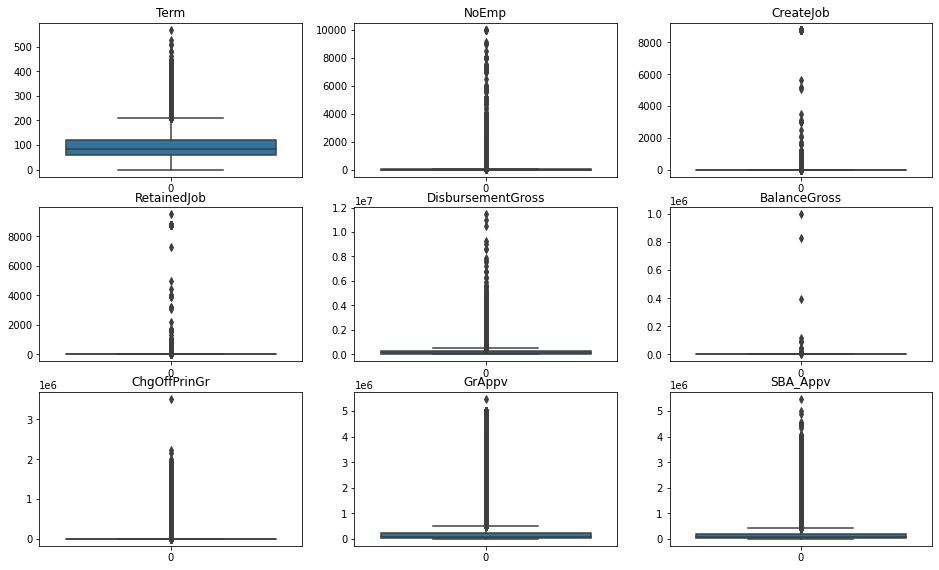

In [41]:
# 透過boxplot檢查outlier
plt.figure(figsize=(16, 30))

for i in range(len(num_cols)):
    plt.subplot(len(num_cols), 3, i + 1)
    plt.title(num_cols[i])
    sns.boxplot(data=df_copy[num_cols[i]])

In [54]:
plt.figure(figsize=(20,80))
df_vis = pd.concat([df_copy[num_cols], df_copy['MIS_Status']], axis=1)
sns.pairplot(df_vis, hue='MIS_Status')

D:\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000231EE913430> (for post_execute):


KeyboardInterrupt: 

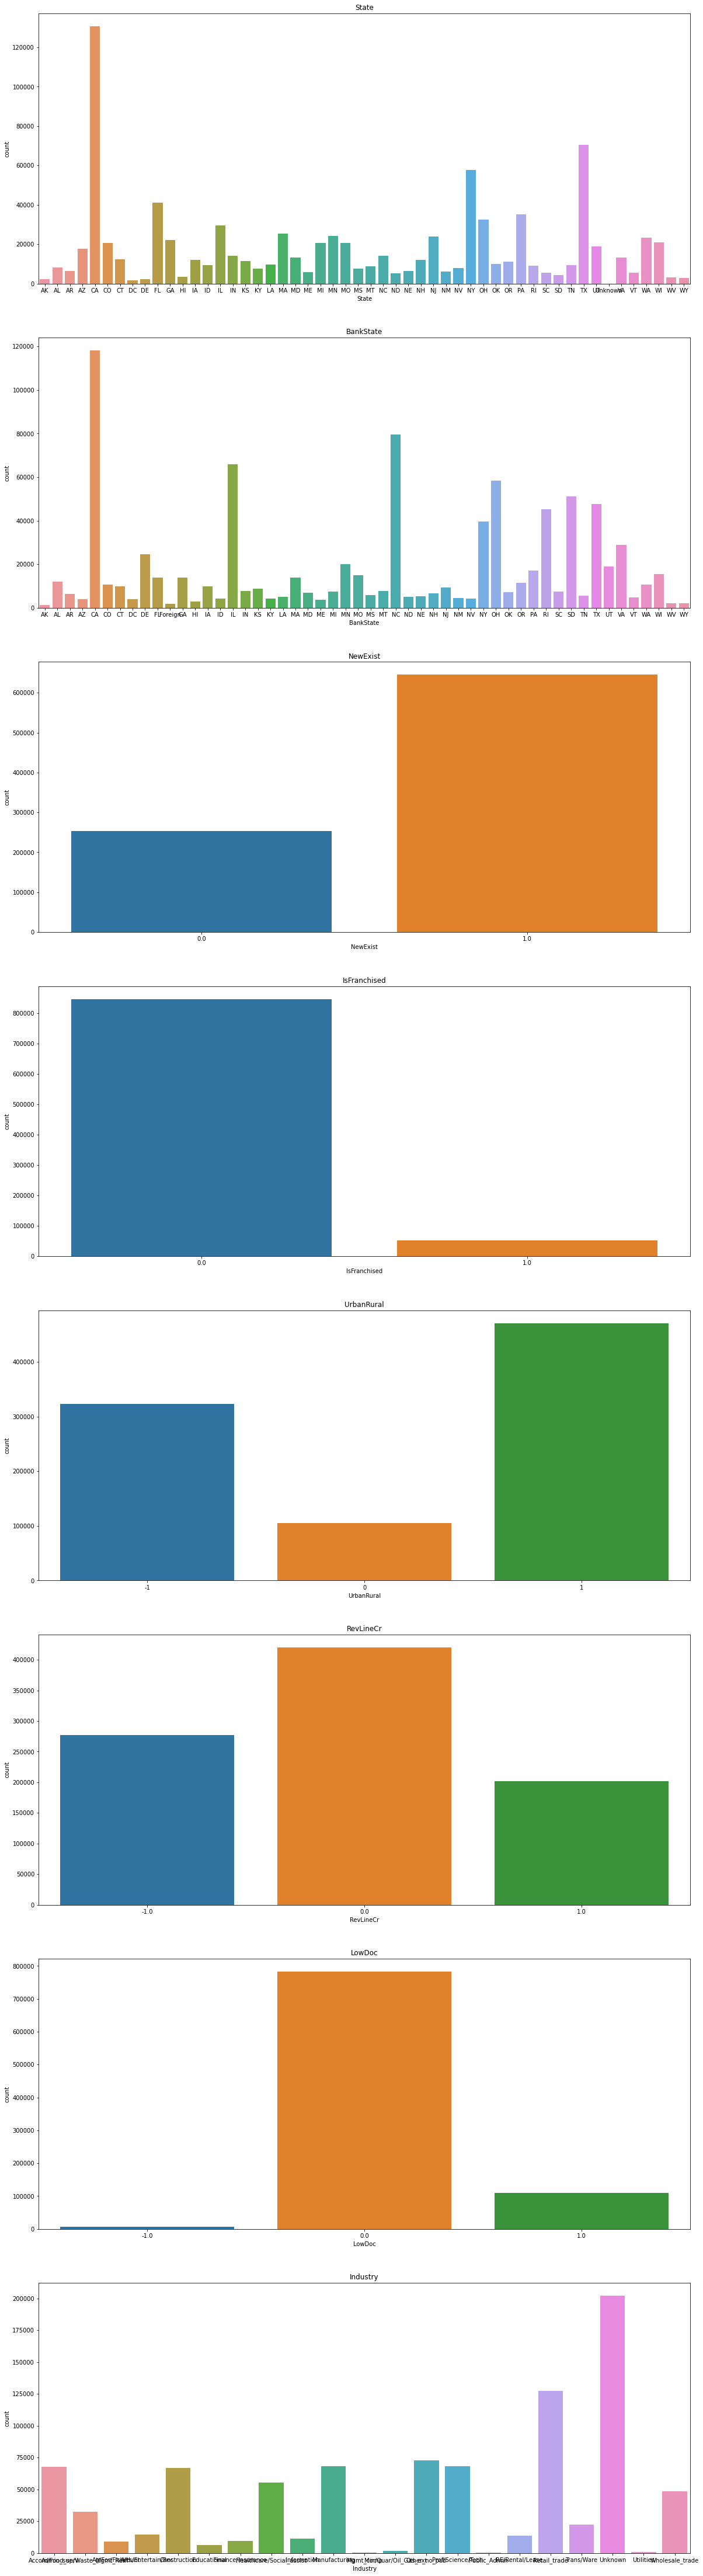

In [49]:
obj_cols = ['State', 'BankState', 'NewExist', 'IsFranchised', 'UrbanRural', 'RevLineCr', 'LowDoc', 'Industry']

# 類別型欄位視覺化
plt.figure(figsize=(20,80))

for i in range(len(obj_cols)):
    plt.subplot(len(obj_cols), 1, i + 1)
    plt.title(obj_cols[i])
    df_temp = pd.DataFrame(df_copy.groupby(obj_cols[i]).size(), columns=['count'])
    sns.barplot(x=df_temp.index, y=df_temp['count'])

plt.show()

In [42]:
# BankState outlier
df_copy['BankState'] = df_copy['BankState'].replace(['PR', 'GU', 'VI', 'EN', 'AN'], 'Foreign')
df_copy['BankState'].nunique()

52

In [43]:
display(df_copy.iloc[:5,:18])
display(df_copy.iloc[:5,18:])

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,IsFranchised,UrbanRural,RevLineCr,LowDoc,ChgOffDate
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,28-Feb-97,84.0,4.0,0.0,0.0,0.0,0.0,-1,0.0,1.0,NaN
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,28-Feb-97,60.0,2.0,0.0,0.0,0.0,0.0,-1,0.0,1.0,NaN
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,28-Feb-97,180.0,7.0,1.0,0.0,0.0,0.0,-1,0.0,0.0,NaN
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,28-Feb-97,60.0,2.0,1.0,0.0,0.0,0.0,-1,0.0,1.0,NaN
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,28-Feb-97,240.0,14.0,1.0,7.0,7.0,0.0,-1,0.0,0.0,NaN


,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,ChgOffDate_year,ChgOffDate_month,ChgOffDate_day,DisbursementDate_year,DisbursementDate_month,DisbursementDate_day,ApprovalDate_year,ApprovalDate_month,ApprovalDate_day,Industry
0,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,NaN,NaN,NaN,1999.0,2.0,28.0,1997.0,2.0,28.0,Retail_trade
1,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,NaN,NaN,NaN,1997.0,5.0,31.0,1997.0,2.0,28.0,Accom/Food_serv
2,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,NaN,NaN,NaN,1997.0,12.0,31.0,1997.0,2.0,28.0,Healthcare/Social_assist
3,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0,NaN,NaN,NaN,1997.0,6.0,30.0,1997.0,2.0,28.0,Unknown
4,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0,NaN,NaN,NaN,1997.0,5.0,14.0,1997.0,2.0,28.0,Unknown


In [44]:
df_copy.to_csv('clean.csv')

In [45]:
# # groupby
# temp = df_copy[pd.isnull(df_copy['LowDoc'])]
# display(pd.DataFrame(temp.groupby(by=['City', 'State']).size().sort_values(ascending=False).head(30)))
# # temp2 = df_copy[df_copy['City'] == 'EL PASO']
# # display(temp2['LowDoc'].value_counts())
# temp2